In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plot

print("Hello!")

Hello!


In [3]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plot.grid(False)
  plot.xticks([])
  plot.yticks([])
  
  plot.imshow(img, cmap=plot.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plot.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plot.grid(False)
  plot.xticks([])
  plot.yticks([])
  thisplot = plot.bar(range(10), predictions_array, color="#777777")
  plot.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
    
    
print(tf.__version__)

1.14.0


In [3]:
# Import fashion data set

fashion_mnist = keras.datasets.fashion_mnist

# Declare class names - classifiers are numbers 0-9 and correspond to the ones in this list

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
# Preprocess data to be between 0 and 1

train_images = train_images / 255.0

print(train_images)

test_images = test_images / 255.0

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [5]:
print(len(train_images))

60000


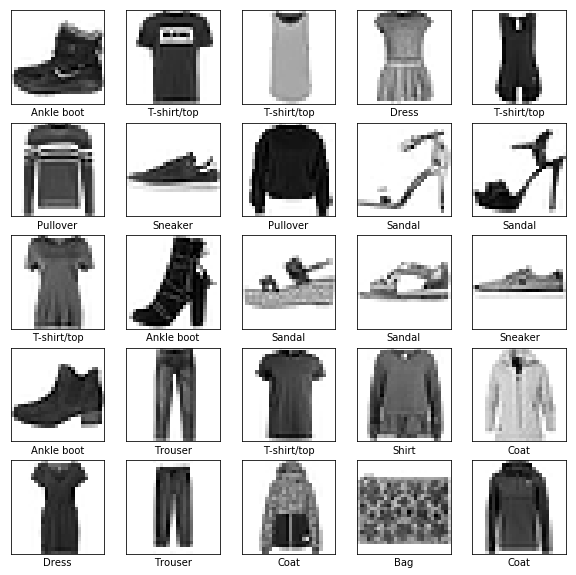

In [16]:
# Plot the first 25 images

plot.figure(figsize=(10,10))
for i in range(25):
    plot.subplot(5,5,i+1)
    plot.xticks([])
    plot.yticks([])
    plot.grid(False)
    plot.imshow(train_images[i], cmap=plot.cm.binary)
    plot.xlabel(class_names[train_labels[i]])
plot.show()

In [6]:
# set up layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Input shape is the dimenstions fo the input, in this case it's a 28x28 pixel picture
    keras.layers.Dense(128, activation=tf.nn.relu), # Initial network layer - Activation is a rectified linear unit equation
    keras.layers.Dense(10, activation=tf.nn.softmax) # 
])

W0626 13:29:31.452530 140735779410816 deprecation.py:506] From /usr/local/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
# Metrics - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

model.compile(optimizer='adam', # Optimizer - how the model is updated based on the data it sees and its loss function
              loss='sparse_categorical_crossentropy',  # Loss - measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
              metrics=['accuracy'])  # Compile the Model

In [21]:
model.fit(train_images, train_labels, epochs=5) # Train the model on the mnist fashion data set

predictions = model.predict(test_images) # Grab predictions from the model

print(predictions[0]) # Print the array of prediction values for the first image correspoding too the w

np.argmax(predictions[0]) # Finds the max predictive value aka the classification for the picture

print(test_labels[0]) # Print the correct classification of the picture

Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 2.3028 - accuracy: 0.0989
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 2.3028 - accuracy: 0.0987
Epoch 3/5
60000/60000 [==============================] - 5s 76us/sample - loss: 2.3027 - accuracy: 0.0999
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 2.3028 - accuracy: 0.0987
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 2.3028 - accuracy: 0.0991
[0.09923232 0.10210413 0.09965923 0.10182016 0.10076781 0.09880435
 0.09759852 0.10082681 0.0986392  0.10054742]
9


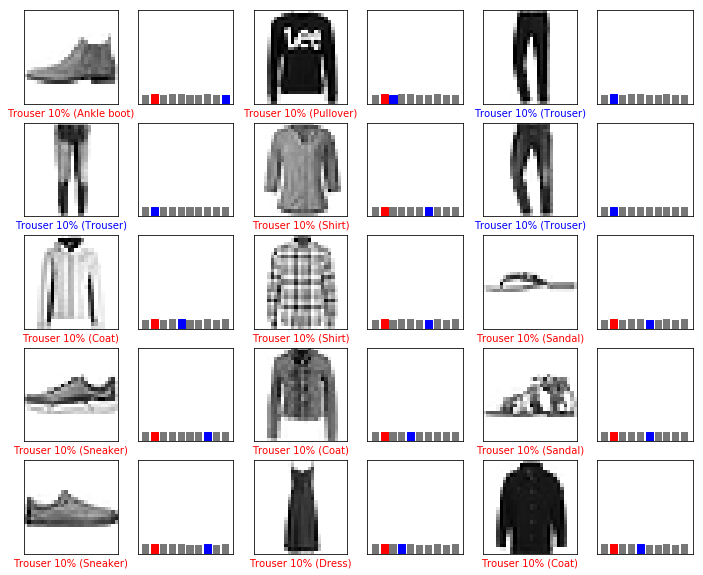

In [22]:
# Plot predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plot.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plot.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plot.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plot.show()

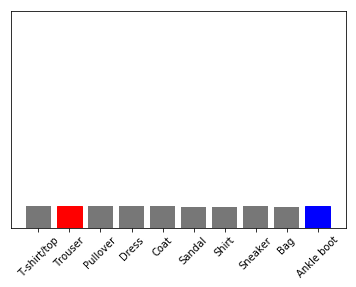

In [23]:
# Grab an image and run it through the model as a test batch of one


img = test_images[0]

img = (np.expand_dims(img,0))

predictions_single = model.predict(img)

plot_value_array(0, predictions_single, test_labels)
_ = plot.xticks(range(10), class_names, rotation=45)